In [1]:
import numpy as np
from matplotlib import animation, pyplot as plt
import scipy.linalg as la
%matplotlib inline

# Problem 1

In [2]:
# ut = .05 * uxx  for x and t in [0,1]
# u(0,t) = 0, u(1,t) = 0
# u(x,0) = 2max{.2 - |x - .5|, 0}
# approximate the solution u(x,t) at time t=.4 by taking 6 subintervals
# in the x dimension and 10 subintervals in time. The graph for U0 and U4
# are given in figures 8.1 and 8.2

# lambda = vk/h**2

f = lambda x: np.array([2*np.max([.2 - np.abs(xi - .5), 0]) for xi in x])
x = np.linspace(0,1,7)
t = np.linspace(0,.4,11)
k = t[1] - t[0]
h = x[1] - x[0]
v = .05
lmbda = v*k/(h**2)
U = np.zeros((11,7))
U[0] = f(x)
this_is_vectorized = np.array([lmbda, 1 - 2*lmbda, lmbda])
for j in range(1,len(t)):
    for i in range(1,len(x)-1):
        U[j,i] = np.dot(this_is_vectorized, U[j-1, i-1:i+2])

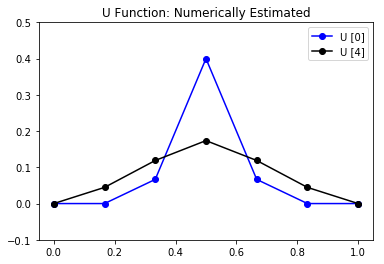

In [3]:
plt.plot(x, U[0], '-ob', label="U [0]")
plt.plot(x, U[-1], '-ok', label="U [4]")
plt.ylim((-.1, .5))
plt.legend()
plt.title("U Function: Numerically Estimated")
plt.show()

# Problem 2

In [5]:
%matplotlib

f = lambda x: np.array([np.max([1 - xi**2, 0]) for xi in x])
x = np.linspace(-12,12,141)
t = np.linspace(0,1,71)
k = t[1] - t[0]
h = x[1] - x[0]
v = 1.
lmbda = v*k/(h**2)
U = np.zeros((71,141))
U[0] = f(x)
this_is_vectorized = np.array([lmbda, 1 - 2*lmbda, lmbda])
for j in range(1,len(t)):
    for i in range(1,len(x)-1):
        U[j,i] = np.dot(this_is_vectorized, U[j-1, i-1:i+2])


def plot_a_pde():
    # Make the x and y data.
    y = U[0]
    # Initialize a matplotlib figure.
    f = plt.figure()
    # Set the x and y axes by constructing an axes object.
    plt.axes(xlim=(-12,12), ylim=(-.1,1.1))
    # Plot an empty line to use in the animation.
    # Notice that we are unpacking a tuple of length 1.
    line, = plt.plot([], [])
    # Define an animation function that will update the line to
    # reflect the desired data for the i'th frame.
    def animate(i):
        # Set the data for updated version of the line.
        line.set_data(x,U[i])
        # Notice that this returns a tuple of length 1.
        return line,
    # Create the animation object.
    # 'frames' is the number of frames before the animation should repeat.
    # 'interval' is the amount of time to wait before updating the plot.
    # Be sure to assign the animation a name so that Python does not
    # immediately garbage collect (delete) the object.
    a = animation.FuncAnimation(f, animate, frames=t.shape[0], interval=50)
    # Show the animation.
    plt.show()
    return a

plot_a_pde()

Using matplotlib backend: Qt5Agg


In [6]:
%matplotlib

f = lambda x: np.array([np.max([1 - xi**2, 0]) for xi in x])
x = np.linspace(-12,12,141)
t = np.linspace(0,1,67)
k = t[1] - t[0]
h = x[1] - x[0]
v = 1.
lmbda = v*k/(h**2)
U = np.zeros((67,141))
U[0] = f(x)
this_is_vectorized = np.array([lmbda, 1 - 2*lmbda, lmbda])
for j in range(1,len(t)):
    for i in range(1,len(x)-1):
        U[j,i] = np.dot(this_is_vectorized, U[j-1, i-1:i+2])


def plot_a_pde():
    # Make the x and y data.
    y = U[0]
    # Initialize a matplotlib figure.
    f = plt.figure()
    # Set the x and y axes by constructing an axes object.
    plt.axes(xlim=(-12,12), ylim=(-.1,1.1))
    # Plot an empty line to use in the animation.
    # Notice that we are unpacking a tuple of length 1.
    line, = plt.plot([], [])
    # Define an animation function that will update the line to
    # reflect the desired data for the i'th frame.
    def animate(i):
        # Set the data for updated version of the line.
        line.set_data(x,U[i])
        # Notice that this returns a tuple of length 1.
        return line,
    # Create the animation object.
    # 'frames' is the number of frames before the animation should repeat.
    # 'interval' is the amount of time to wait before updating the plot.
    # Be sure to assign the animation a name so that Python does not
    # immediately garbage collect (delete) the object.
    a = animation.FuncAnimation(f, animate, frames=t.shape[0], interval=50)
    # Show the animation.
    plt.show()
    return a

plot_a_pde()

Using matplotlib backend: Qt5Agg


# Problem 3

In [7]:
%matplotlib inline
u1_estimates = []
steps = [20,40,80,160,320,640]
K = []
for step in steps:
    f = lambda x: np.array([np.max([1 - xi**2, 0]) for xi in x])
    x = np.linspace(-12,12,step+1)
    t = np.linspace(0,1,step+1)
    k = t[1] - t[0]
    K.append(k)
    h = x[1] - x[0]
    v = 1.
    lmbda = v*k/(h**2)
    U = np.zeros((step+1,step+1))
    U[0] = f(x)
    
    B = np.diag(np.ones(step+1)*(1 + 2*lmbda)) \
        + np.diag(np.ones(step)*(-lmbda), 1) \
        + np.diag(np.ones(step)*(-lmbda), -1)
    A = np.diag(np.ones(step+1)*(1 - 2*lmbda)) \
        + np.diag(np.ones(step)*(lmbda), 1) \
        + np.diag(np.ones(step)*(lmbda), -1)
    
    for j in range(1,len(t)):
        U[j] = la.solve(B, A.dot(U[j-1]))
    u1_estimates.append(U[-1])

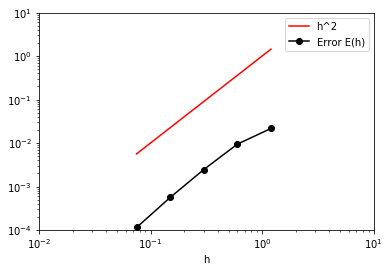

In [8]:
error = []
for i in range(len(steps)-1):
    error.append(la.norm(u1_estimates[i] - u1_estimates[-1][::int(steps[-1]/steps[i])], ord=np.inf))

H = np.array([24/step for step in steps[:-1]])
plt.loglog(H, H**2, 'r', label = "h^2")
plt.loglog(H, error, '-ok', label = "Error E(h)")
plt.xlim((1e-2, 1e1))
plt.ylim((1e-4,1e1))
plt.legend()
plt.xlabel("h")
plt.show()